In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


from sklearn.model_selection import train_test_split
from nptdms import TdmsFile
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam



In [9]:
def read_tdms(file_path):
    
    tdms_file =TdmsFile.read(file_path)
    
    data = {}
    channels=[]
    for group in tdms_file.groups():
        for channel in group.channels():
            channel_name=channel.name
            data[channel_name]=channel[:]
            channels.append(channel_name)
    
    df=pd.DataFrame(data)
    
    return df,channels

In [10]:
def data_scaling(df_set):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_set)

    # Create a DataFrame from the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=df_set.columns)
    
    return scaled_df


In [19]:
def data_preprocess():
    
    print("\nconverting files to data frames: ")
    
    #getting dataframes
    
    df1,channels1 = read_tdms('/Users/sandeepreddy/Desktop/summer_work/Learning/Test_Health_Unhealth_data/Healthy_Q110_R14_05_16_2023_13_20_03.tdms')
    df2,channels2 = read_tdms('/Users/sandeepreddy/Desktop/summer_work/Learning/Test_Health_Unhealth_data/Healthy_Q110_R25_05_16_2023_13_47_21.tdms')


    df3,channels3 = read_tdms('/Users/sandeepreddy/Desktop/summer_work/Learning/Test_Health_Unhealth_data/Unhealthy_Q110_R11_05_16_2023_15_18_59.tdms')

    df4,channels4 = read_tdms('/Users/sandeepreddy/Desktop/summer_work/Learning/Test_Health_Unhealth_data/Unhealthy_Q110_R16_05_16_2023_15_26_58.tdms')

    #we will use df1 and df2 for training and  testing, df3 for predictions
    
    print("\ndroping time column :")
    df1=df1.drop('Time',axis=1)
    df2=df2.drop('Time', axis=1)
    df3=df3.drop('Time',axis=1)
    df4=df4.drop('Time', axis=1)
#     df5=df5.drop('Time', axis=1)
#     df6=df6.drop('Time', axis=1)



    print("\nAdding Status column(target variables) for dataframes :")
    df1['Status']=0
    df2['Status']=0
    
    df3['Status']=1
    df4['Status']=1
#     df5['Status']=1
#     df6['Status']=1

    print("\nconcatinating two dataframes(healthy df1,df2,unhealthy df3,df4) into one whole dataset df")
    df=pd.concat([df1.sample(frac=1),df2.sample(frac=1),df3.sample(frac=1),df4.sample(frac=1)], ignore_index=False)
    
    
    print("\nscaling data using data_scaling function self-defined above")
    scaled_df=data_scaling(df)
    
    print(scaled_df.info())
    print("Converting  DataFrame to a numpy array")
    data = scaled_df.values  # Convert DataFrame to a numpy array

    print("\nSeparating the features and the labels")
    features = data[:, :-1]  # Extract all columns except the last one
    labels = data[:, -1]  # Extract the last column as labels
    
    print("Splitting the data into training and testing sets")
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

#     print(features.info())
    
    
    print("Reshaping the features to get 3D array")
    # Reshape the features
    num_features = train_features.shape[1]
    num_timesteps = 1


    train_features = train_features.reshape(-1, num_timesteps, num_features)
    test_features = test_features.reshape(-1, num_timesteps, num_features)

    

    # Verify the new shape
    print("train features shape", train_features.shape)
    print("test features shape", test_features.shape)
    print("train labels", train_labels)
    print("test labels", test_labels)
    
    return train_features, test_features, num_features, num_timesteps, train_labels, test_labels


In [20]:

print("Start Data preprocessing : ")
# data_process()
train_features, test_features, num_features, num_timesteps, train_labels, test_labels=data_preprocess()

print("Data preprocessing completed")

print("Defining the CNN architecture..")
# Define the CNN architecture
model = tf.keras.Sequential([
    layers.Reshape((64, 1), input_shape=(1, 64)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

print("Compiling the Model")
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("compilation completed")

print("Training the Model")
# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=16)

print("Model Training COmpleted..")

print("Evaluating the Model..")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

print("Test loss is", test_loss)
print("Test accuracy is", test_accuracy)

print("Performing predictions for testdata")
# Make predictions
predictions = model.predict(test_features)


# Assuming predictions is the numpy array you provided
# predictions = predictions.flatten().tolist()
np.set_printoptions(suppress=True)  # Disable scientific notation

# print("predictions : ", predictions )







Start Data preprocessing : 

converting files to data frames: 

droping time column :

Adding Status column(target variables) for dataframes :

concatinating two dataframes(healthy df1,df2,unhealthy df3,df4) into one whole dataset df

scaling data using data_scaling function self-defined above
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B7043_18A          14800 non-null  float64
 1   B5395_18A          14800 non-null  float64
 2   B5384_18A          14800 non-null  float64
 3   B5408_18A          14800 non-null  float64
 4   IW4-0626-0-CHAN-1  14800 non-null  float64
 5   IW4-0626-0-CHAN-2  14800 non-null  float64
 6   LV219701_20A       14800 non-null  float64
 7   B7046_18A          14800 non-null  float64
 8   B4524_18A          14800 non-null  float64
 9   B7032_18A          14800 non-null  float64
 10  B5401_18A      

In [8]:
def prediction_preprocessing(file_path):
    df3,channels3 = read_tdms(file_path)
    
    df3=df3.drop('Time',axis=1)
    
    scaled_df=data_scaling(df)
    
    data = scaled_df.values  # Convert DataFrame to a numpy array
    
    pred_features = data.shape[1]
    pred_timesteps = data.shape[0] // data.shape[0]


    pred_input = data.reshape(-1, pred_timesteps, pred_features)
    
    return pred_input

In [9]:
import numpy as np

print("Predicting for new dataset using CNN model")


# file_path='C:\\code\\PROJECTS\\DS_Bridge_project\\OneDrive\\Healthy_Q110_R29_05_16_2023_13_55_23.tdms'
file_path='/Users/sandeepreddy/Desktop/code_pratice/Test_Health_Unhealth_data/Unhealthy_Q110_R22_05_16_2023_15_36_23.tdms'
# file_path="C:\\code\\PROJECTS\\DS_Bridge_project\\OneDrive\\Unhealthy_Q110_R13_05_16_2023_15_22_35.tdms"

# input_3Darray=prediction_preprocessing()

df3,channels3 = read_tdms(file_path)
    
df3=df3.drop('Time',axis=1)

scaled_df=data_scaling(df3)

data = scaled_df.values  # Convert DataFrame to a numpy array


# Reshape the new data
num_samples = scaled_df.shape[0]
num_features = scaled_df.shape[1]
num_timesteps = 1  # Assuming each sample has only one timestep

# Reshape the data into (num_samples, num_timesteps, num_features)
input_3Darray = np.reshape(data, (num_samples, num_timesteps, num_features))
print ("The input_3Darray is",input_3Darray)

print("Input shape:", input_3Darray.shape)


predictions = model.predict(input_3Darray)

# # Assuming predictions is the numpy array you provided
# predictions = predictions.flatten().tolist()

np.set_printoptions(suppress=True)  # Disable scientific notation

print("predictions : ", predictions )

# Assuming predictions is the array you provided
threshold = 0.5

# Convert probabilities to class labels
predicted_labels = np.where(predictions > threshold, 1, 0)
predicted_labels = predicted_labels.flatten().tolist()

# print("predictied_labels.......", predicted_labels)



threshold = 0.5

# Calculate average
average = sum(predicted_labels) / len(predicted_labels)

# Check if average is greater than threshold
if average < threshold:
    print("Healthy")
else:
    print("Unhealthy")

Predicting for new dataset using CNN model
The input_3Darray is [[[0.08396792 0.12416649 0.03683766 ... 0.06783323 0.0754327  0.056996  ]]

 [[0.08204707 0.15554437 0.04993452 ... 0.06434195 0.07418061 0.05956642]]

 [[0.07978325 0.09671499 0.06874525 ... 0.06879219 0.07759067 0.05892382]]

 ...

 [[0.10578309 0.20392306 0.24794946 ... 0.06867722 0.08894992 0.06749422]]

 [[0.10564592 0.27318964 0.24632131 ... 0.07445966 0.09349666 0.06913753]]

 [[0.10564592 0.27318964 0.26758962 ... 0.06879206 0.09304083 0.06942383]]]
Input shape: (2789, 1, 64)
88/88 [==============================] - 0s 365us/step
predictions :  [[0.43548065]
 [0.70826685]
 [0.99998575]
 ...
 [0.7519016 ]
 [0.77401316]
 [0.98780495]]
Unhealthy


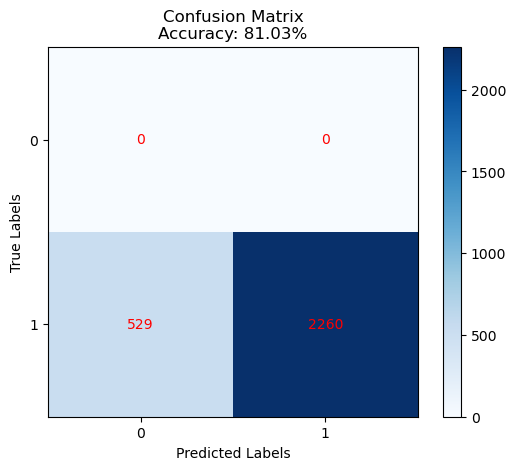

Accuracy: 81.03%


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Example predicted labels and ground truth labels
predicted_labels = np.array(predicted_labels)
list = [1] * num_samples
ground_truth_labels = np.array(list)

# Create confusion matrix
cm = confusion_matrix(ground_truth_labels, predicted_labels)

# Calculate accuracy
accuracy = np.diagonal(cm).sum() / cm.sum()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\nAccuracy: {:.2%}'.format(accuracy))  # Include accuracy in the title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.colorbar()

# Add count values to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()

# Print accuracy in the console
print('Accuracy: {:.2%}'.format(accuracy))


In [18]:
import numpy as np

print("Predicting for new dataset using CNN model")


file_path = '/Users/sandeepreddy/Desktop/code_pratice/Test_Health_Unhealth_data/Unhealthy_Q110_R22_05_16_2023_15_36_23.tdms'
# file_path="C:\\code\\PROJECTS\\DS_Bridge_project\\OneDrive\\Unhealthy_Q110_R22_05_16_2023_15_36_23.tdms"

# input_3Darray=prediction_preprocessing()

df3,channels3 = read_tdms(file_path)
    
df3=df3.drop('Time',axis=1)

scaled_df=data_scaling(df3)

data = scaled_df.values  # Convert DataFrame to a numpy array


# Reshape the new data
num_samples = scaled_df.shape[0]
num_features = scaled_df.shape[1]
num_timesteps = 1  # Assuming each sample has only one timestep

# Reshape the data into (num_samples, num_timesteps, num_features)
input_3Darray = np.reshape(data, (num_samples, num_timesteps, num_features))

print("Input shape:", input_3Darray.shape)


predictions = model.predict(input_3Darray)

# # Assuming predictions is the numpy array you provided
# predictions = predictions.flatten().tolist()

np.set_printoptions(suppress=True)  # Disable scientific notation

print("predictions : ", predictions )

# Assuming predictions is the array you provided
threshold = 0.5

# Convert probabilities to class labels
predicted_labels = np.where(predictions > threshold, 1, 0)
predicted_labels = predicted_labels.flatten().tolist()

# print("predictied_labels.......", predicted_labels)



threshold = 0.5

# Calculate average
average = sum(predicted_labels) / len(predicted_labels)

# Check if average is greater than threshold
if average < threshold:
    print("Healthy")
else:
    print("Unhealthy")

Predicting for new dataset using CNN model
Input shape: (2789, 1, 64)
88/88 [==============================] - 0s 351us/step
predictions :  [[0.7427711 ]
 [0.9960484 ]
 [0.9999991 ]
 ...
 [0.99732316]
 [0.9979282 ]
 [0.9998385 ]]
Unhealthy


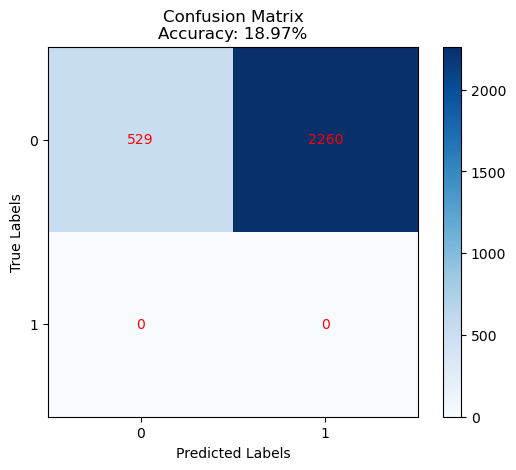

Accuracy: 18.97%


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Example predicted labels and ground truth labels
predicted_labels = np.array(predicted_labels)
list = [0] * num_samples
ground_truth_labels = np.array(list)

# Create confusion matrix
cm = confusion_matrix(ground_truth_labels, predicted_labels)

# Calculate accuracy
accuracy = np.diagonal(cm).sum() / cm.sum()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\nAccuracy: {:.2%}'.format(accuracy))  # Include accuracy in the title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.colorbar()

# Add count values to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()

# Print accuracy in the console
print('Accuracy: {:.2%}'.format(accuracy))


In [23]:

print("Start Data preprocessing : ")
train_features, test_features, num_features, num_timesteps, train_labels, test_labels=data_preprocess()

print("Data preprocessing completed")

print("Defining the CNN architecture..")
# Define the CNN architecture
model = tf.keras.Sequential([
    layers.Reshape((64, 1), input_shape=(1, 64)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

print("Compiling the Model")
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("compilation completed")

print("Training the Model")


# # Train the model
# model.fit(train_features, train_labels, epochs=15, batch_size=16)

# print("Model Training COmpleted..")

# print("Evaluating the Model..")

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(test_features, test_labels)

# print("Test loss is", test_loss)
# print("Test accuracy is", test_accuracy)

# print("Performing predictions for testdata")
# # Make predictions
# predictions = model.predict(test_features)


# # Assuming predictions is the numpy array you provided
# # predictions = predictions.flatten().tolist()
# np.set_printoptions(suppress=True)  # Disable scientific notation

# # print("predictions : ", predictions )






Start Data preprocessing : 

converting files to data frames: 

droping time column :

Adding Status column(target variables) for dataframes :

concatinating two dataframes(healthy df1,df2,unhealthy df3,df4) into one whole dataset df

scaling data using data_scaling function self-defined above
Converting  DataFrame to a numpy array

Separating the features and the labels
Splitting the data into training and testing sets
Reshaping the features to get 3D array
train features shape (11840, 1, 64)
test features shape (2960, 1, 64)
train labels [1. 1. 1. ... 0. 0. 0.]
test labels [1. 0. 0. ... 1. 0. 0.]
Data preprocessing completed
Defining the CNN architecture..
Compiling the Model
compilation completed
Training the Model


Epoch 1/15 - Training Loss: 0.0720 - Training Accuracy: 0.9806 - Validation Loss: 0.0031 - Validation Accuracy: 0.9993
Epoch 2/15 - Training Loss: 0.0017 - Training Accuracy: 0.9998 - Validation Loss: 0.0006 - Validation Accuracy: 1.0000
Epoch 3/15 - Training Loss: 0.0006 - Training Accuracy: 1.0000 - Validation Loss: 0.0003 - Validation Accuracy: 1.0000
Epoch 4/15 - Training Loss: 0.0003 - Training Accuracy: 1.0000 - Validation Loss: 0.0008 - Validation Accuracy: 1.0000
Epoch 5/15 - Training Loss: 0.0003 - Training Accuracy: 1.0000 - Validation Loss: 0.0001 - Validation Accuracy: 1.0000
Epoch 6/15 - Training Loss: 0.0001 - Training Accuracy: 1.0000 - Validation Loss: 0.0002 - Validation Accuracy: 1.0000
Epoch 7/15 - Training Loss: 0.0011 - Training Accuracy: 0.9997 - Validation Loss: 0.0001 - Validation Accuracy: 1.0000
Epoch 8/15 - Training Loss: 0.0001 - Training Accuracy: 1.0000 - Validation Loss: 0.0001 - Validation Accuracy: 1.0000
Epoch 9/15 - Training Loss: 0.0000 - Training Ac

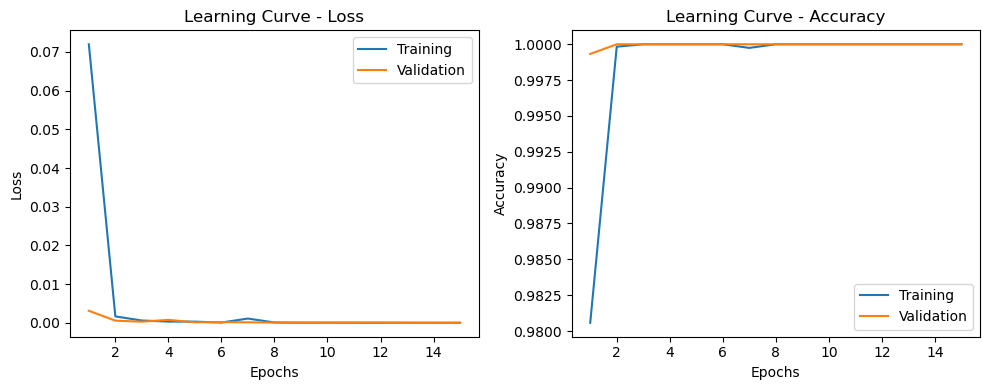

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define empty lists to store performance metrics
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []
num_epochs=15

# Training loop
for epoch in range(num_epochs):
    # Perform training and record metrics
    history = model.fit(train_features, train_labels, epochs=1, batch_size=16, verbose=0)
    
    # Calculate performance metrics for training and validation sets
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate the model on the validation set
    val_loss_, val_accuracy_ = model.evaluate(test_features, test_labels, verbose=0)
    val_loss.append(val_loss_)
    val_accuracy.append(val_accuracy_)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss[-1]:.4f} - Training Accuracy: {train_accuracy[-1]:.4f} - Validation Loss: {val_loss[-1]:.4f} - Validation Accuracy: {val_accuracy[-1]:.4f}")

# Plot the learning curve
epochs = np.arange(1, num_epochs+1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training')
plt.plot(epochs, val_accuracy, label='Validation')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
846/846 [==============================] - 6s 5ms/step - loss: 0.0661 - accuracy: 0.9744 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 2/100
846/846 [==============================] - 4s 5ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 3/100
846/846 [==============================] - 4s 5ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 4.2999e-04 - val_accuracy: 1.0000
Epoch 4/100
846/846 [==============================] - 4s 4ms/step - loss: 5.9336e-04 - accuracy: 0.9997 - val_loss: 2.7110e-04 - val_accuracy: 1.0000
Epoch 5/100
846/846 [==============================] - 4s 4ms/step - loss: 6.9912e-05 - accuracy: 1.0000 - val_loss: 2.0444e-04 - val_accuracy: 1.0000
Epoch 6/100
846/846 [==============================] - 4s 5ms/step - loss: 4.9447e-05 - accuracy: 1.0000 - val_loss: 1.4354e-04 - val_accuracy: 1.0000
Epoch 7/100
846/846 [==============================] - 4s 4ms/step - loss: 4.7355e-05 - accuracy: 1.0000 - val_los

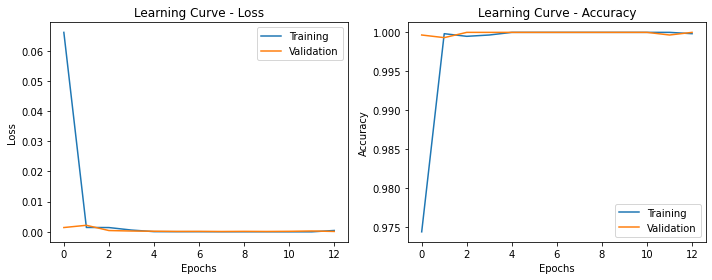

In [204]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN architecture
model = tf.keras.Sequential([
    layers.Reshape((64, 1), input_shape=(1, 64)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_features, train_labels, epochs=100, batch_size=14, validation_data=(test_features, test_labels), callbacks=[early_stopping])

# Plot the learning curve
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [221]:
df1,channels1 = read_tdms('C:\\code\\PROJECTS\\DS_Bridge_project\\OneDrive\\Healthy_Q110_R14_05_16_2023_13_20_03.tdms')
df1.shape

(4608, 65)

In [219]:
d_arr=df1.values
d_arr.shape

(4608, 65)